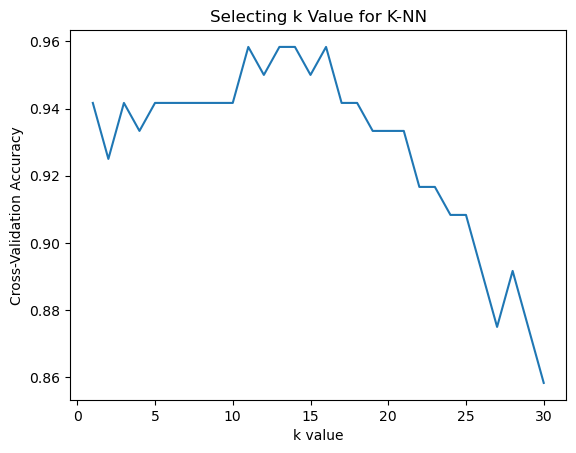

The optimal k value is: 11


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Load the Iris dataset
from sklearn.datasets import load_iris
iris = load_iris()
data = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])
data['target'] = iris['target']

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(data.drop(columns=['target']))
y = data['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List to store cross-validation scores
cv_scores = []

# Range of k values to test
k_range = range(1, 31)

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# Plotting the cross-validation scores
plt.plot(k_range, cv_scores)
plt.xlabel('k value')
plt.ylabel('Cross-Validation Accuracy')
plt.title('Selecting k Value for K-NN')
plt.show()

# Optimal k value
optimal_k = k_range[cv_scores.index(max(cv_scores))]
print(f"The optimal k value is: {optimal_k}")
